In [200]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

# Create Dataset

In [201]:
english=[]
dutch=[]
with open("data/data.txt","r",encoding="utf-8")as f:
    for i in f.readlines():
        if i.split("|")[0]=="en":
            english.append(i.split("|")[1])
        else:
            dutch.append(i.split("|")[1])
train=[]
for i in english:
    train.append([i,0])
for i in dutch:
    train.append([i,1])
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)
language_labels=["English","Dutch"]

# Create Tokenizer Instance

In [202]:
token=tf.keras.preprocessing.text.Tokenizer(1000,oov_token="<OOV>")
token.fit_on_texts(x)
sequences=token.texts_to_sequences(x)
padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(sequences,padding="post",truncating="post",maxlen=100)

# Create Model

In [203]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(token.word_index)+1,2,input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])

# Get Summary Of Model

In [204]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 2)            11338     
                                                                 
 global_average_pooling1d_10  (None, 2)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_20 (Dense)            (None, 128)               384       
                                                                 
 dense_21 (Dense)            (None, 2)                 258       
                                                                 
Total params: 11,980
Trainable params: 11,980
Non-trainable params: 0
_________________________________________________________________


# Compile The Model

In [205]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [206]:
history=model.fit(padded_sequences,y,epochs=30,validation_split=0.1)

Epoch 1/30
31/31 [==============================] - 2s 23ms/step - loss: 0.6932 - accuracy: 0.5062 - val_loss: 0.6942 - val_accuracy: 0.4393
Epoch 2/30
31/31 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.5062 - val_loss: 0.6952 - val_accuracy: 0.4393
Epoch 3/30
31/31 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5062 - val_loss: 0.6915 - val_accuracy: 0.4393
Epoch 4/30
31/31 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.6570 - val_loss: 0.6888 - val_accuracy: 0.4393
Epoch 5/30
31/31 [==============================] - 0s 7ms/step - loss: 0.6785 - accuracy: 0.5135 - val_loss: 0.6759 - val_accuracy: 0.4486
Epoch 6/30
31/31 [==============================] - 0s 8ms/step - loss: 0.6537 - accuracy: 0.8877 - val_loss: 0.6445 - val_accuracy: 0.7196
Epoch 7/30
31/31 [==============================] - 0s 7ms/step - loss: 0.6074 - accuracy: 0.7775 - val_loss: 0.5792 - val_accuracy: 1.0000
Epoch 8/30
31/31 [=

# Accuracy Graph

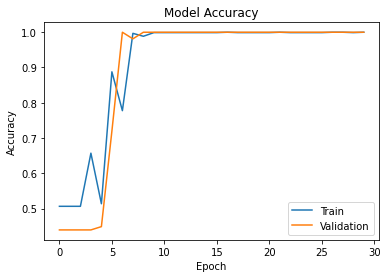

In [207]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

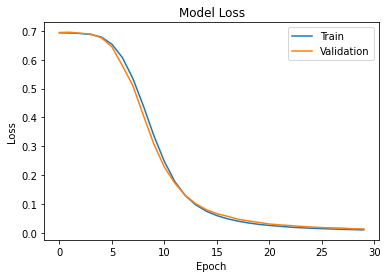

In [208]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Predict On Test Sentences

In [209]:
test_sentences=["hi bro, my name is abhimanyu. nice to meet you! im a programmer and i created this NLP model to classify that a given sentence is in English or Dutch","hallo bro, mijn naam is abhimanyu. Aangenaam! ik ben een programmeur en ik heb dit NLP-model gemaakt om te classificeren dat een bepaalde zin in het Engels of Nederlands is"]
token.fit_on_texts(test_sentences)
sequences=token.texts_to_sequences(test_sentences)
test_padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=100,padding="post",truncating="post")
give_label=[np.round(i) for i in model.predict(test_padded_sequences)]
detected_language=[]
confidences=[]
for i in give_label:
    detected_language.append(language_labels[i.argmax()])
for i in model.predict(test_padded_sequences):
    confidences.append(i)
for j,i in enumerate(detected_language):
    print(f"Detected {i} Language In Sentence {j} With Confidence {np.max(confidences[j])}")

1/1 [==============================] - 0s 50ms/step
Detected English Language In Sentence 0 With Confidence 0.9912410974502563
Detected Dutch Language In Sentence 1 With Confidence 0.995238184928894


# Save The Model

In [210]:
model.save("classifier.h5")

# Convert To TFLite Model For Edge Devices

In [211]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("classifier.tflite","wb")as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpx2bldu5q\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpx2bldu5q\assets
